Error propagation

Monte Carlo Methods/Integration

Model fitting/Curve fitting

In [1]:
import numpy as np
import scipy as sp
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline

Error Propagation

In [7]:
X, errX = 10, 0.5
Y, errY = 7, 0.25

In [8]:
# quard
Z = X+Y
Zerr = np.sqrt(errX**2 + errY**2)
print(Z, np.round(Zerr,2))

17 0.56


In [11]:
# MC
nsample = 10000
Xrvs = st.norm.rvs(loc=X, scale=errX, size=nsample)
Yrvs = st.norm.rvs(loc=Y, scale=errY, size=nsample)
Xrvs.mean(), Xrvs.std(), Yrvs.mean(), Yrvs.std()

(10.002461614637303,
 0.4967398828707766,
 7.000301126117911,
 0.24955453967798844)

In [17]:
Zrvs = Xrvs + Yrvs
Zrvs.mean(), Zrvs.std()

(17.002762740755216, 0.5571461323418437)

van der Waals equation [Page 42]

$(P + a/V^2)(V-b) = RT$

$P = \frac{RT}{V-b} - \frac{a}{V^2}$

P=11.88, 0.02 MPa

In [19]:
def pressure(V, T, a, b, R):
    first_term = R*T/(V-b)
    second_term = a/V**2
    return first_term - second_term

In [22]:
V, Verr = 2e-4, 3e-7
T, Terr = 298, 0.2
a, b, R = 1.408e-1, 3.913e-5, 8.3145

P = pressure(V, T, a, b, R)
print(P/1e6)

11.882007832411261


In [25]:
Vrvs = st.norm.rvs(loc=V, scale=Verr, size=nsample)
Trvs = st.norm.rvs(loc=T, scale=Terr, size=nsample)

Prvs = pressure(Vrvs, Trvs, a, b, R)

Prvs.mean()/1e6, Prvs.std()/1e6

(11.882211725435273, 0.02113226691148821)

Monte Carlo Integration

https://www.wolframalpha.com/input/?i=NIntegrate%5B1%2F%281%2BSinh%5B2x%5D*Log%5Bx%5D%5E2%29%2C+%7Bx%2C0.8%2C3%7D%5D


$y = \frac{1}{1 + \sinh(2x) \log(x)^2}$, x=[0.8,3]

Answer = 0.67684

In [26]:
def func(x):
    return 1/(1 + np.sinh(2*x)*np.log(x)**2)

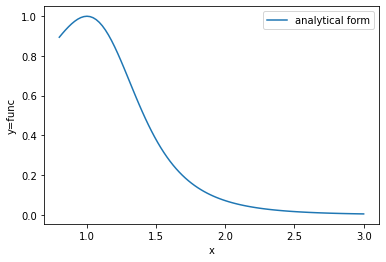

In [37]:
x = np.linspace(0.8, 3, 100)
y = func(x)
ymin, ymax = y.min(), y.max()

plt.plot(x, y, label='analytical form')
plt.xlabel('x');plt.ylabel('y=func')
plt.legend()

In [58]:
nsample = 250000
a, b = 0.8, 3

xrvs = st.uniform.rvs(a, b-a, nsample)
yrvs = st.uniform.rvs(ymin, ymax, nsample)

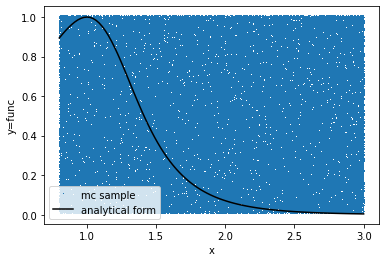

In [59]:
plt.plot(xrvs, yrvs,',',color='C0', label='mc sample')
plt.plot(x, y, 'k', label='analytical form')
plt.xlabel('x');plt.ylabel('y=func')
plt.legend()

In [60]:
yrvs_selected = []
xrvs_selected = []
for i in range(nsample):
    if yrvs[i] <= func(xrvs[i]):
        yrvs_selected.append(yrvs[i])
        xrvs_selected.append(xrvs[i])

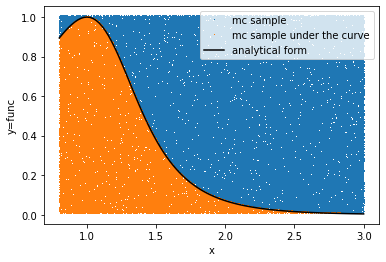

In [61]:
plt.plot(xrvs, yrvs,',',color='C0', label='mc sample')
plt.plot(xrvs_selected, yrvs_selected,',',color='C1', label='mc sample under the curve')
plt.plot(x, y, 'k', label='analytical form')
plt.xlabel('x');plt.ylabel('y=func')
plt.legend()

In [62]:
# Monte Carlo Integration formula
#ymax*(b-a)*points_under_the_curve/total_points

ymax*(b-a)*len(yrvs_selected)/nsample

0.6696184000000001